In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline
import seaborn as sns

## Data collection and preprocessing

### Data collection

Data source - Kaggle

In [2]:
df = pd.read_csv('vgsales.csv')
# dataset saved in the variable df
df.shape

(16597, 11)

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16597 non-null  int64  
 1   Name          16597 non-null  object 
 2   Platform      16597 non-null  object 
 3   Year          16326 non-null  float64
 4   Genre         16597 non-null  object 
 5   Publisher     16539 non-null  object 
 6   NA_Sales      16597 non-null  float64
 7   EU_Sales      16597 non-null  float64
 8   JP_Sales      16597 non-null  float64
 9   Other_Sales   16597 non-null  float64
 10  Global_Sales  16597 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Data Preprocessing

#### Deleting the unwanted column

'Rank' column is not usefull for this analysis. So, the column of Rank will be deleted

In [5]:
df.drop('Rank', axis=1, inplace=True)

#### Mitigating null values

In [6]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(16290, 10)

There are some null values in the data set. These null values will create hinderance in the analysis, so it is required to mitigate them. In our case, we are deleting their rows.

#### Mitigating duplicate values

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(16290, 10)

Duplicates values would provide extra non needed data for analysis. Therefore, we need to mitigate them. In our case, there are no duplicate values.

#### Changing the data type

In [10]:
df['Year'] = df['Year'].astype(int)

In [11]:
df['Year'].dtypes

dtype('int32')

Years are integer values only but our data set has 'Year' column as float data type. So, we need to transform the data type into integer.

#### Creating our own column

The Year column has a vast set of unique values. So, a new feature (column) has to be created to ease out our analysis.

In [12]:
def map_to_decade(year):
    if 1980 <= year <= 1989:
        return '1980-1989'
    elif 1990 <= year <= 1999:
        return '1990-1999'
    elif 2000 <= year <= 2009:
        return '2000-2009'
    elif 2010 <= year <= 2019:
        return '2010-2019'

df['Decade'] = df['Year'].apply(map_to_decade)

## Data Analysis

### Statistical Analysis

The statistical analysis is performed usind describe() method of pandas. It is performed on the columns 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' and 'Global_Sales'.

In [13]:
df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000
mean,0.265646,0.147740,0.078838,0.048428,0.540926
std,0.822457,0.509317,0.311888,0.190089,1.567391
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


It can be seen in the output that the average sales of video games is 0.26 millions in North America, 0.14 millions in European Union, 0.07 millions in Japan and 0.04 millions in other regions summing upto 0.54 millions globally. The maximum and minimun sales in the repective regions can also be seen.

### Graphical Analysis

In [14]:
sns.set(rc={'figure.figsize':(20,5)})

#### Finding out the maximum in Platform, Decade, Genre and Publisher

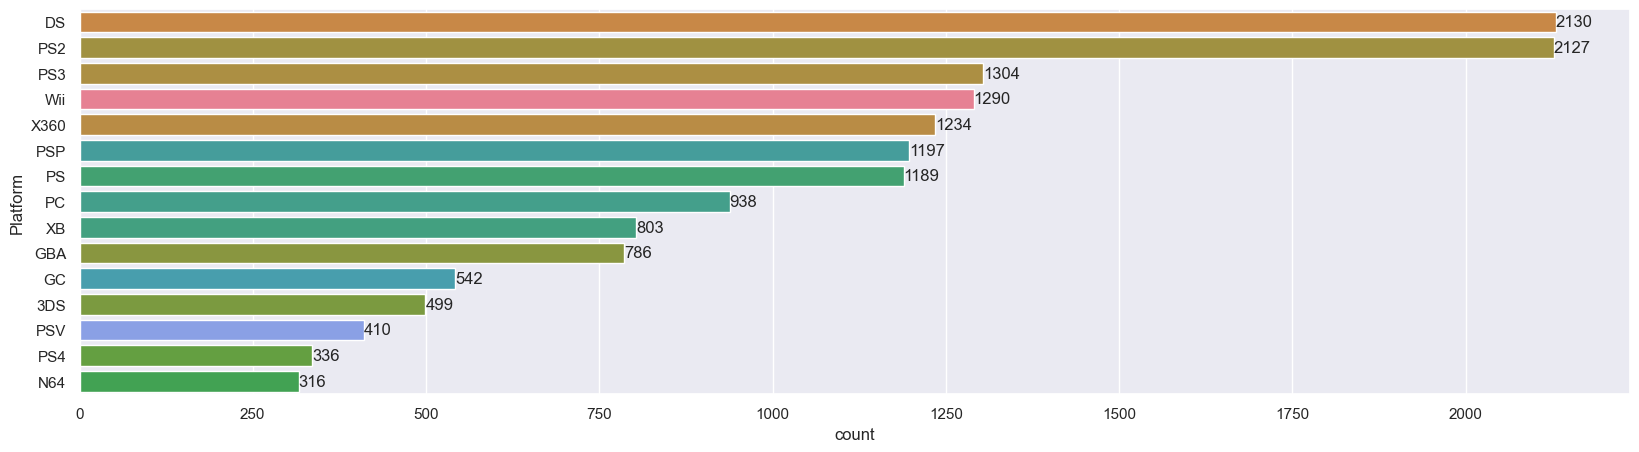

In [15]:
plot_order = df['Platform'].value_counts().sort_values(ascending=False).head(15)
plot = sns.countplot(data = df, y = 'Platform', order=plot_order.index, hue='Platform')
for bars in plot.containers:
    plot.bar_label(bars)

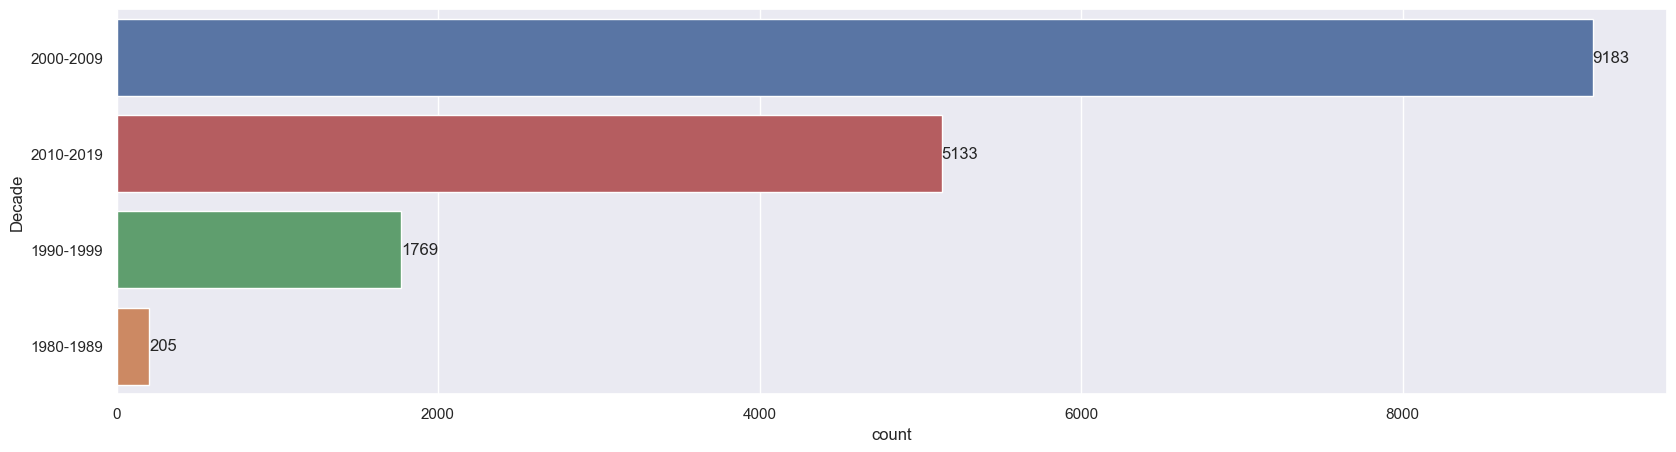

In [16]:
plot_order = df['Decade'].value_counts().sort_values(ascending=False)
plot = sns.countplot(data = df, y= 'Decade', order=plot_order.index, hue='Decade')
for bars in plot.containers:
    plot.bar_label(bars)

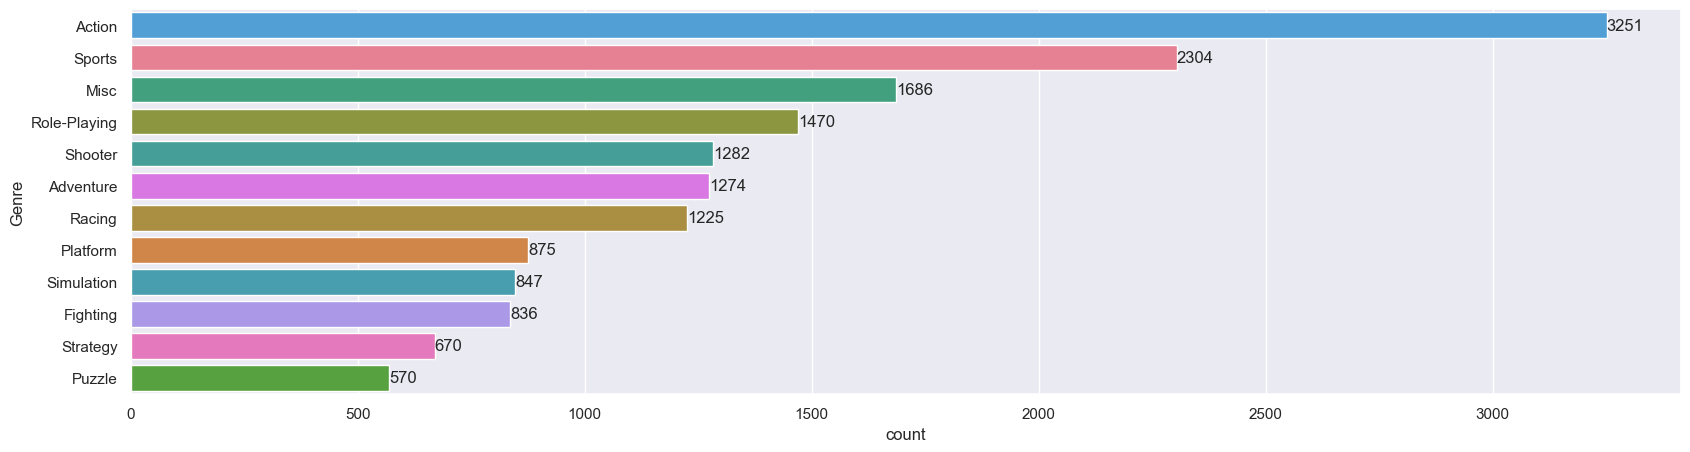

In [17]:
plot_order = df['Genre'].value_counts().sort_values(ascending=False)
plot = sns.countplot(data = df, y = 'Genre', order=plot_order.index, hue='Genre')
for bars in plot.containers:
     plot.bar_label(bars)

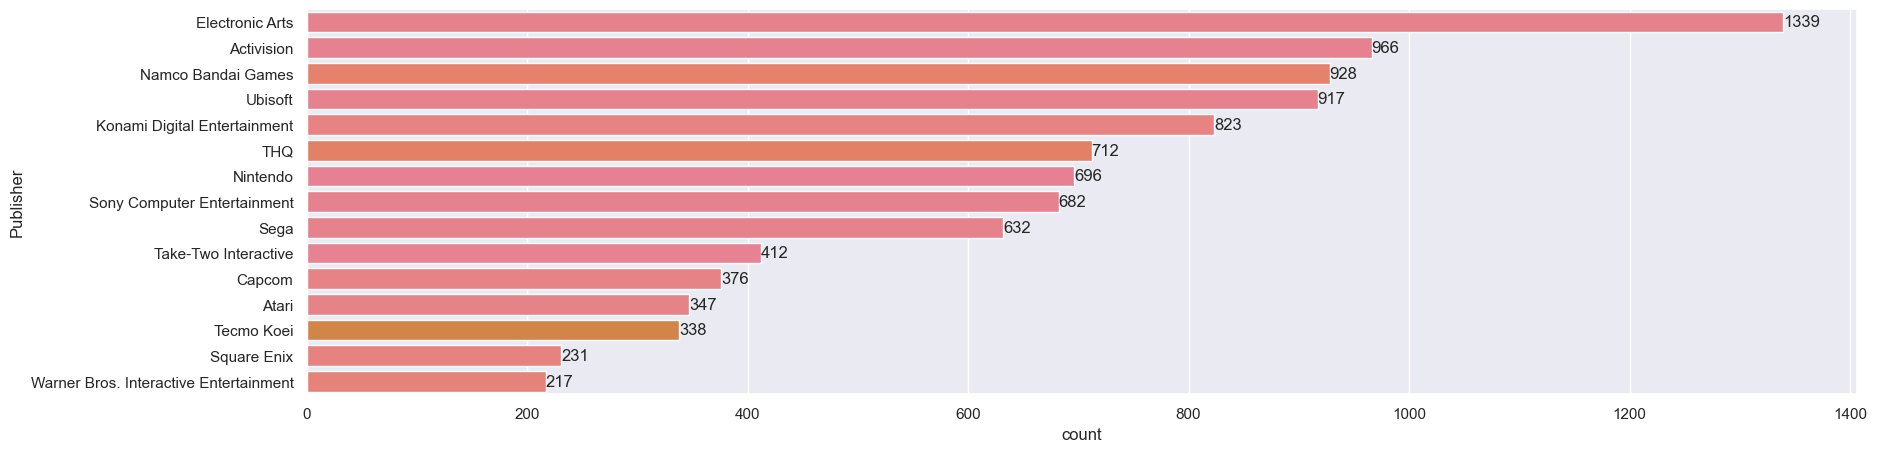

In [18]:
plot_order = df['Publisher'].value_counts().sort_values(ascending=False).head(15)
plot = sns.countplot(data = df, y = 'Publisher', order = plot_order.index, hue='Publisher')
for bars in plot.containers:
    plot.bar_label(bars)

DS and PS2 are the platform that have more than 2000 releases followed by PS3, Wii, X360, PSP and PS with releases counting between 1100 and 1500.
The decade of 2000-2009 has seen the most amount of releases with 9183 releases followed by 2010-2019 with 5133 releases.
The most favored genre of games is action with 3125 games made in this genre. It is followed by Sports genre with 2304 games made in it.
Electronics Arts has published the highest amount of games - more than 1000 with Activision, Namco Bandai Games and Ubisoft getting close to 1000.

#### Analysis of games on the basis of sales

<Axes: xlabel='NA_Sales', ylabel='Name'>

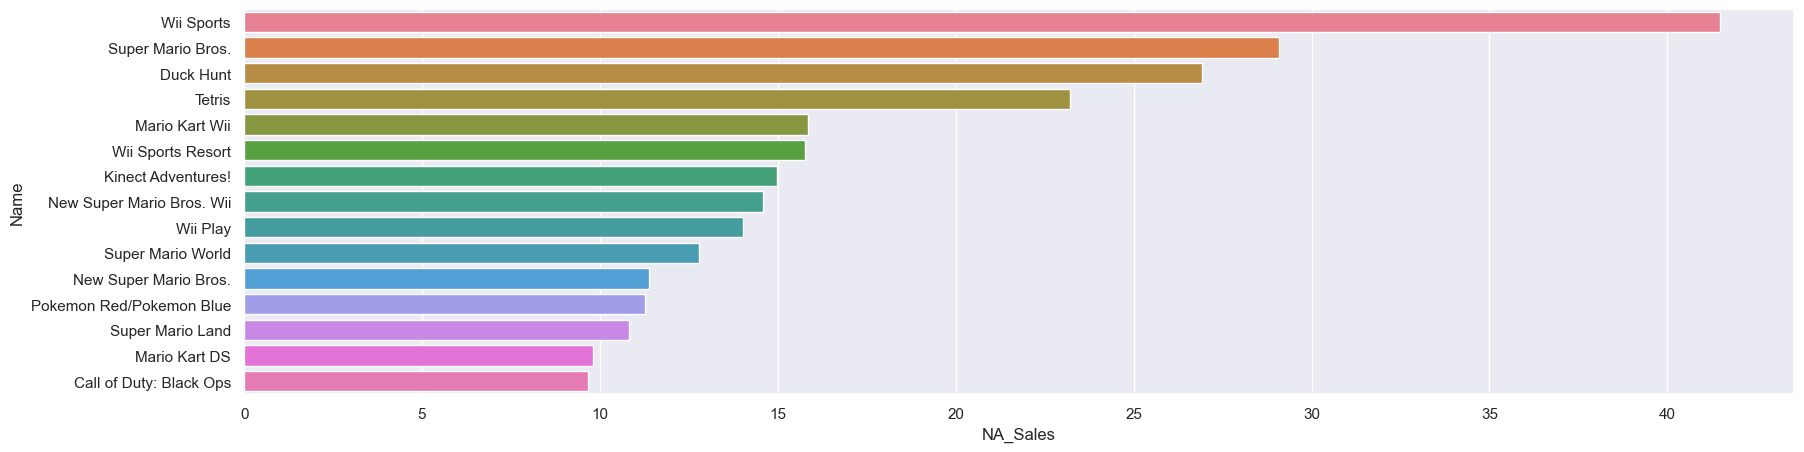

In [19]:
plot_data = df[['Name','NA_Sales']].sort_values(by = 'NA_Sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'NA_Sales', y = 'Name', hue='Name')

<Axes: xlabel='EU_Sales', ylabel='Name'>

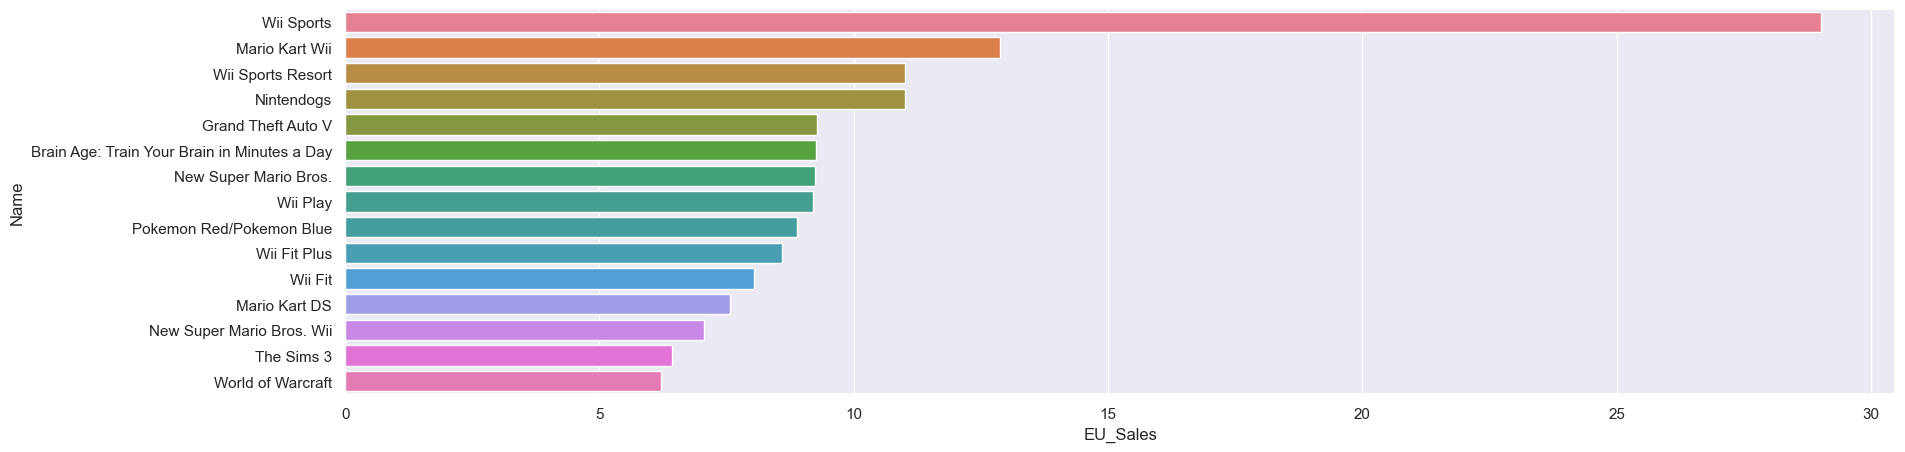

In [20]:
plot_data = df[['Name','EU_Sales']].sort_values(by = 'EU_Sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'EU_Sales', y = 'Name', hue='Name')

<Axes: xlabel='JP_Sales', ylabel='Name'>

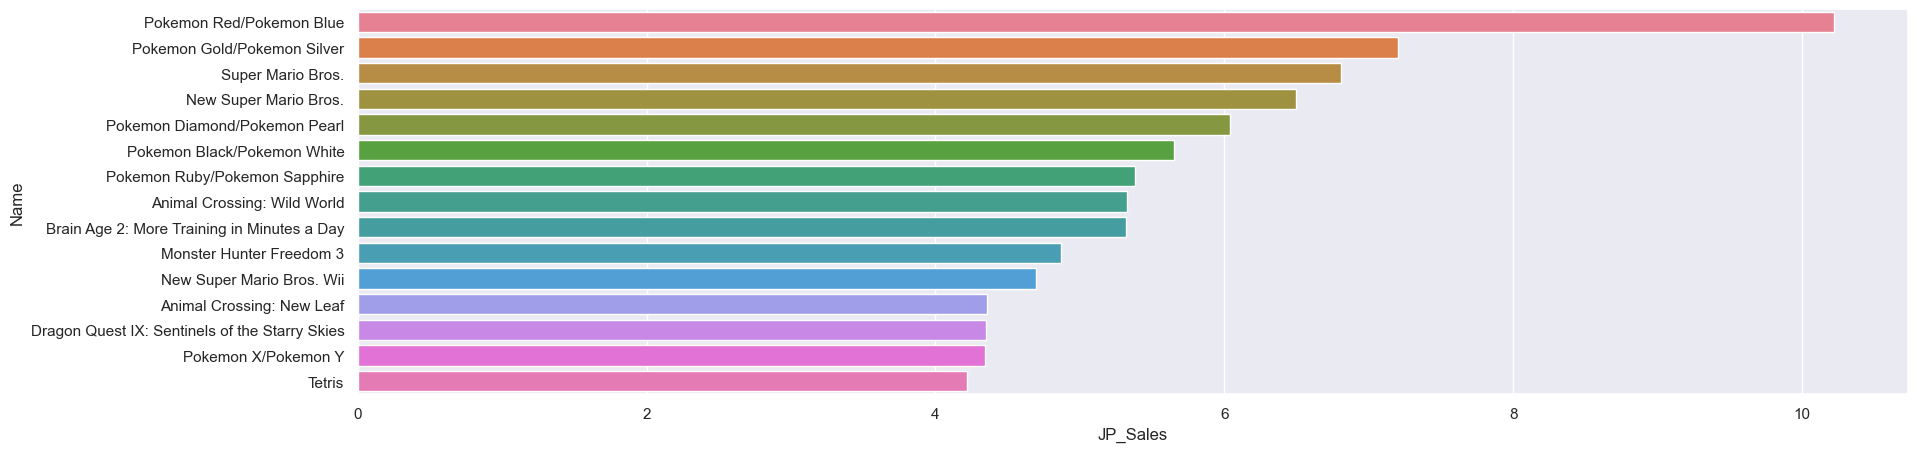

In [21]:
plot_data = df[['Name','JP_Sales']].sort_values(by = 'JP_Sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'JP_Sales', y = 'Name', hue='Name')

<Axes: xlabel='Other_Sales', ylabel='Name'>

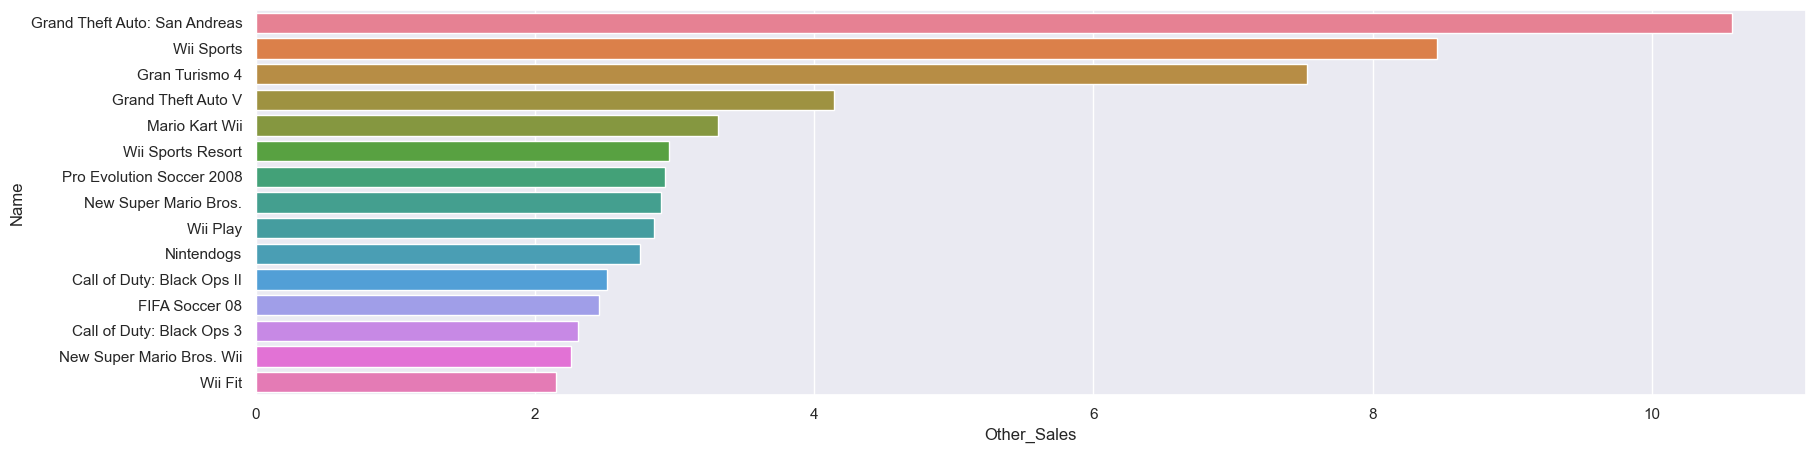

In [22]:
plot_data = df[['Name','Other_Sales']].sort_values(by = 'Other_Sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'Other_Sales', y = 'Name', hue='Name')

<Axes: xlabel='Global_Sales', ylabel='Name'>

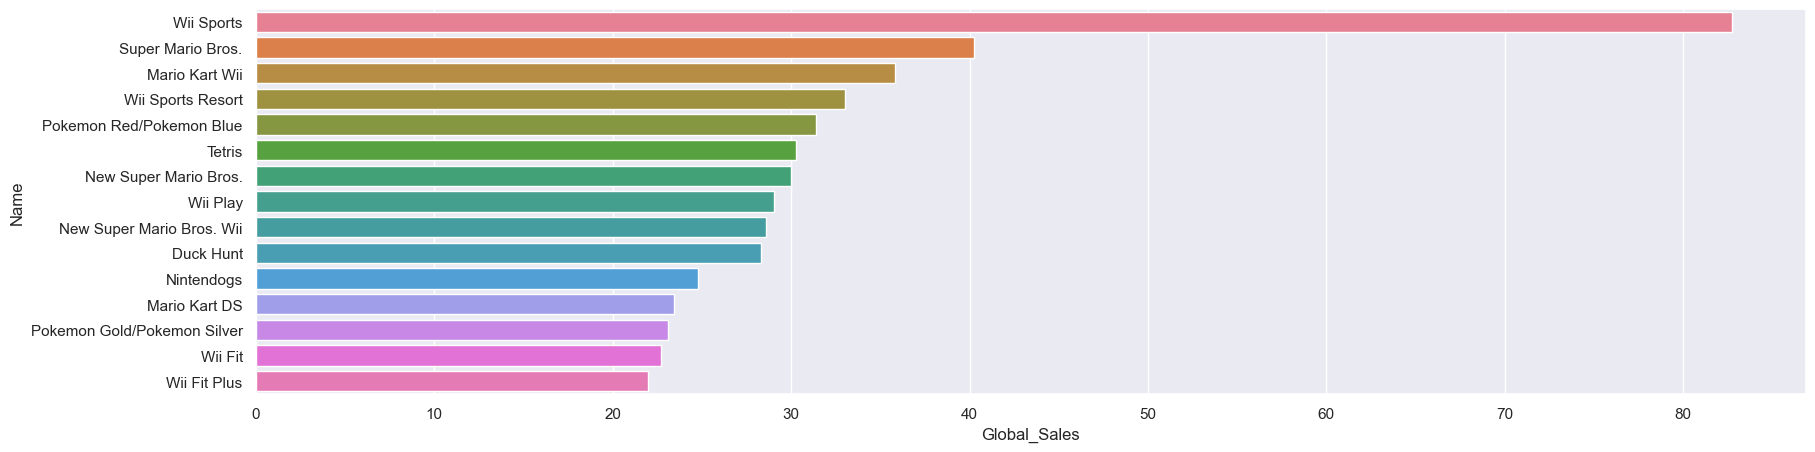

In [23]:
plot_data = df[['Name','Global_Sales']].sort_values(by = 'Global_Sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x = 'Global_Sales', y = 'Name', hue='Name')

Wii Sports is the most sold game in North America and European Union. Pokemon Red/Pokemon Blue is the most bought game in Japan while Grand Theft Auto: San Andreas is the most bought one in other regions. Wii Sports game stands highest in the global sales of video games.

#### Analysis of Platform on the bases of sales

<Axes: xlabel='NA_Sales', ylabel='Platform'>

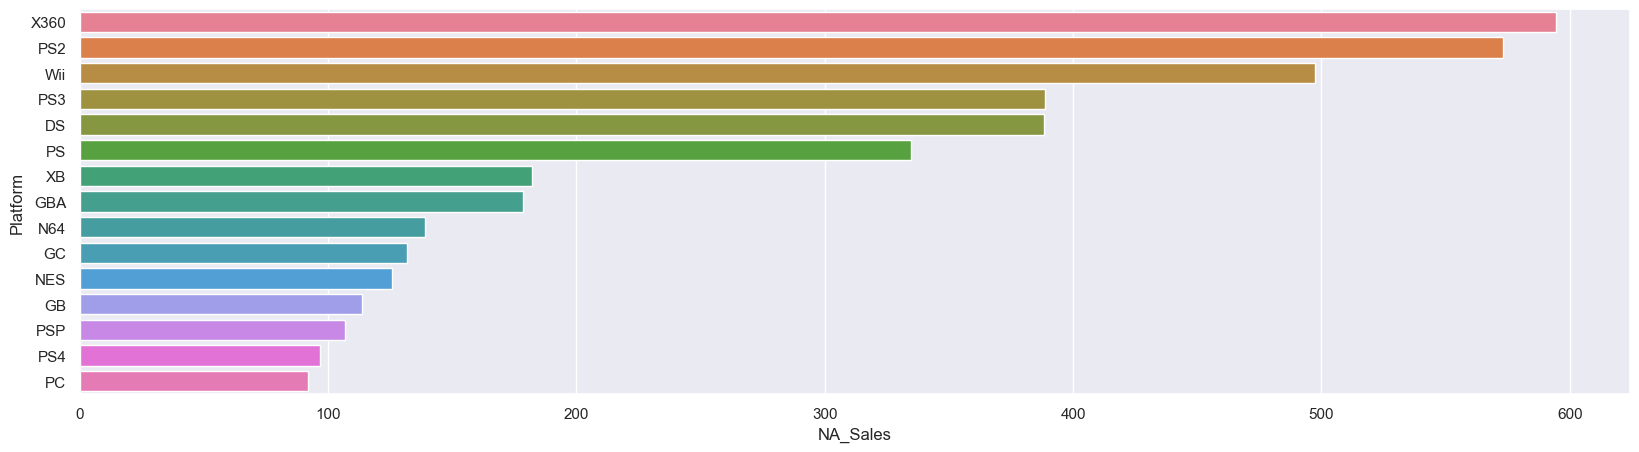

In [24]:
plot_data = df.groupby(['Platform'], as_index=False)['NA_Sales'].sum().sort_values(by='NA_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'NA_Sales', y = 'Platform', hue='Platform')

<Axes: xlabel='EU_Sales', ylabel='Platform'>

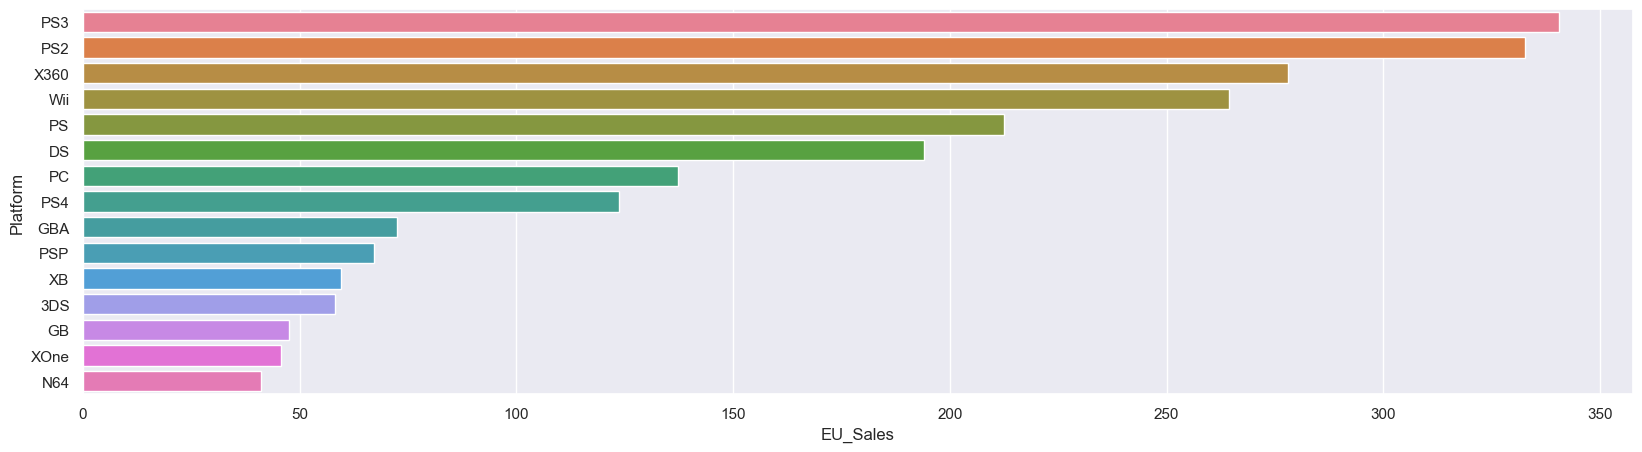

In [25]:
plot_data = df.groupby(['Platform'], as_index=False)['EU_Sales'].sum().sort_values(by='EU_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'EU_Sales', y = 'Platform', hue='Platform')

<Axes: xlabel='JP_Sales', ylabel='Platform'>

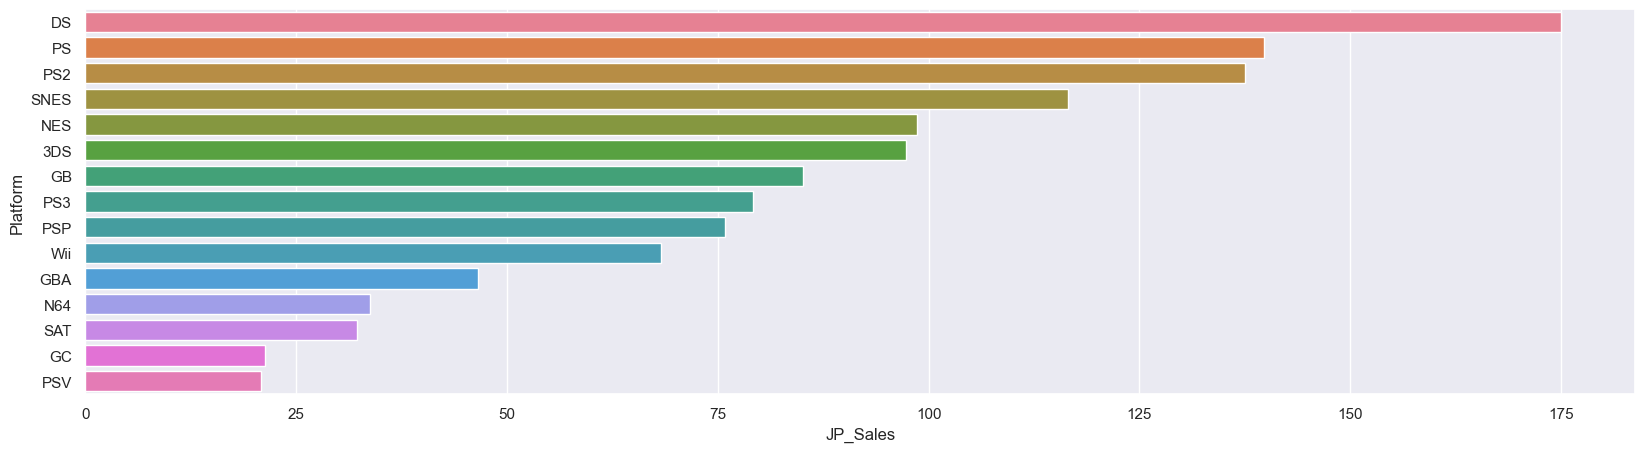

In [26]:
plot_data = df.groupby(['Platform'], as_index=False)['JP_Sales'].sum().sort_values(by='JP_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'JP_Sales', y = 'Platform', hue='Platform')

<Axes: xlabel='Other_Sales', ylabel='Platform'>

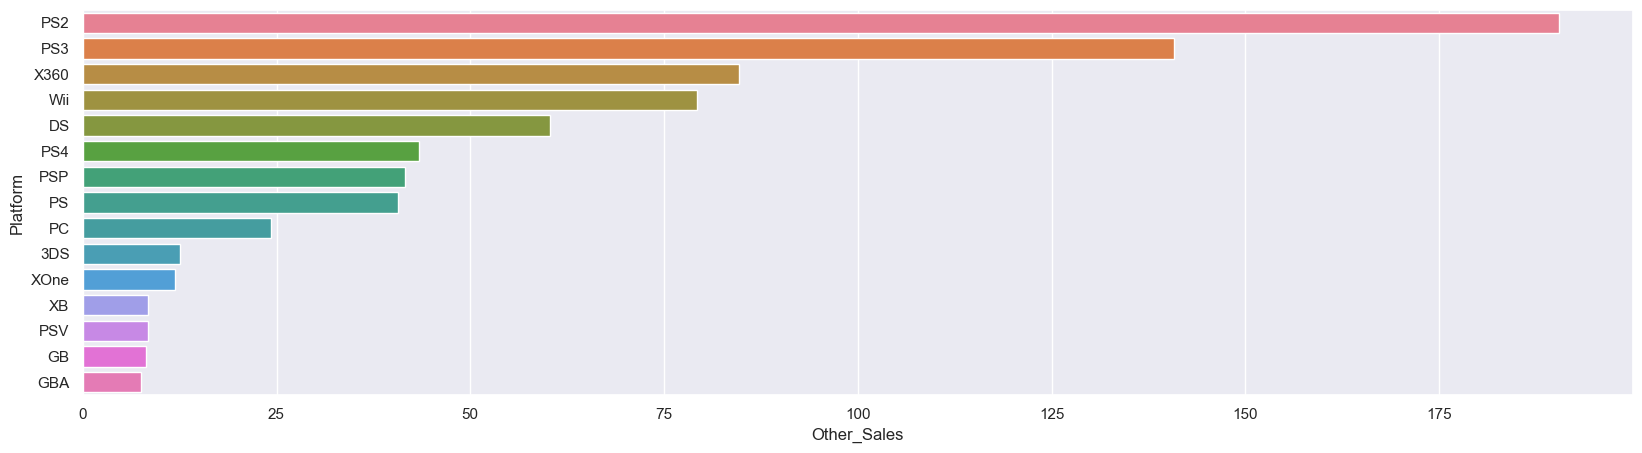

In [27]:
plot_data = df.groupby(['Platform'], as_index=False)['Other_Sales'].sum().sort_values(by='Other_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'Other_Sales', y = 'Platform', hue='Platform')

<Axes: xlabel='Global_Sales', ylabel='Platform'>

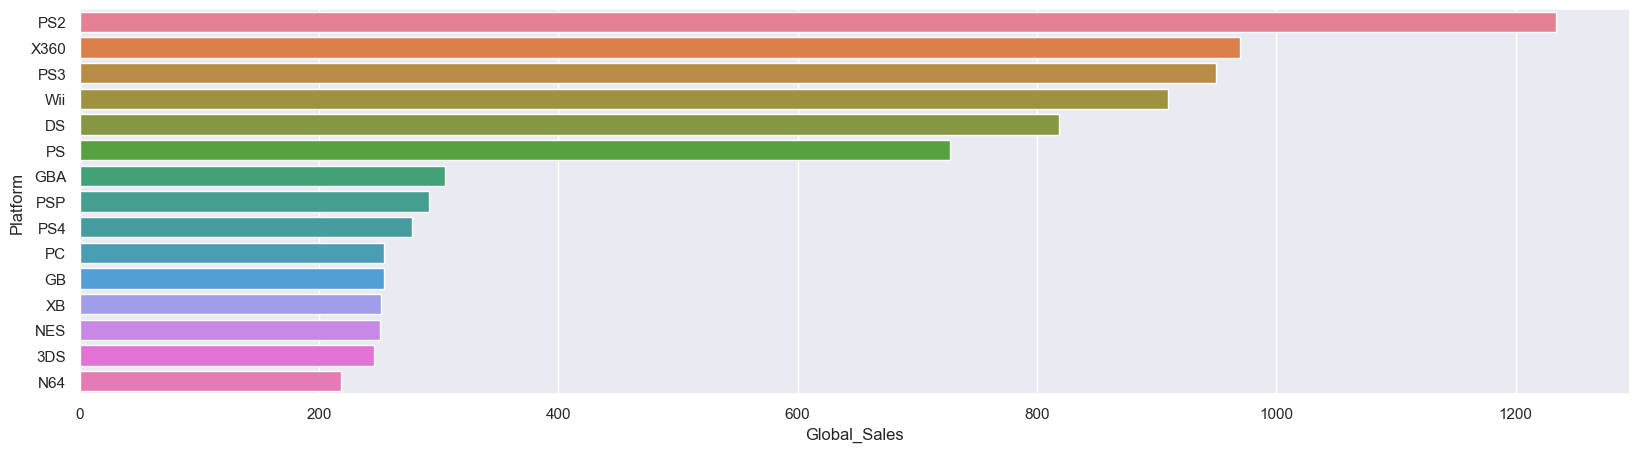

In [28]:
plot_data = df.groupby(['Platform'], as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'Global_Sales', y = 'Platform', hue='Platform')

X360 is the most used platform in North America while PS3 and DS are the most used in European Union and Japan respectively. PS2 is the most used platform in other regions and globally as well.

#### Analysis of Publisher on the basis of sales

<Axes: xlabel='NA_Sales', ylabel='Publisher'>

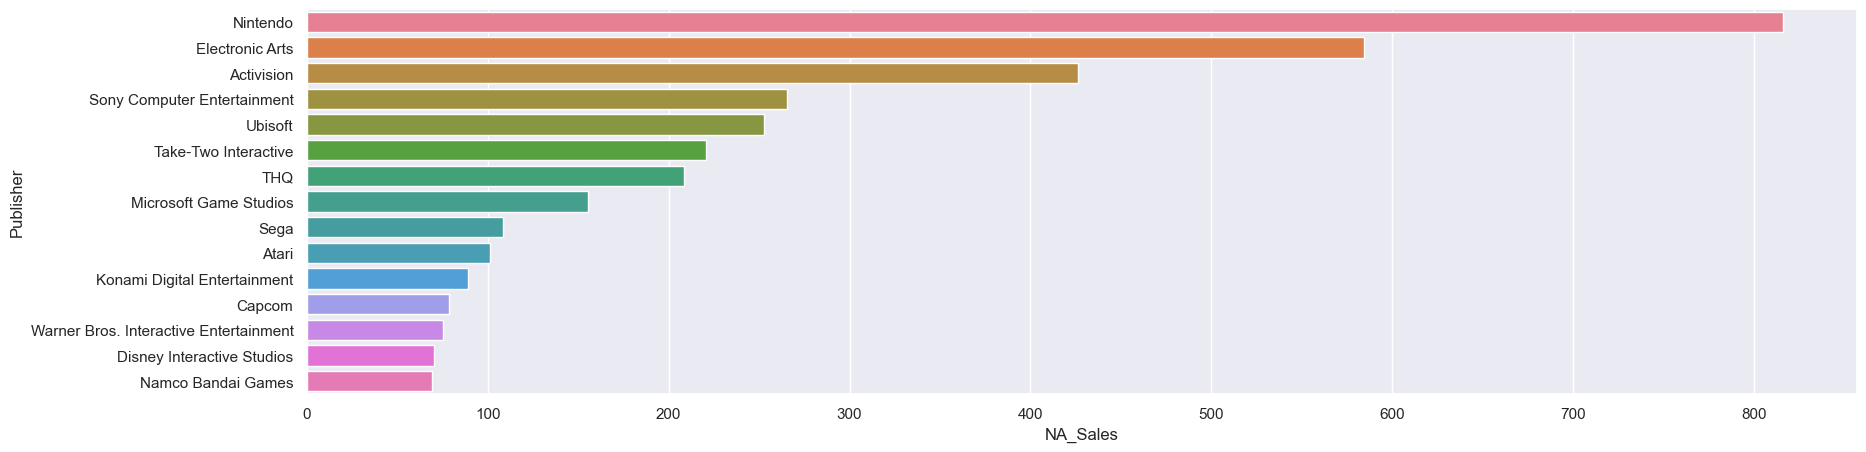

In [29]:
plot_data = df.groupby(['Publisher'], as_index=False)['NA_Sales'].sum().sort_values(by='NA_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'NA_Sales', y = 'Publisher', hue='Publisher')

<Axes: xlabel='EU_Sales', ylabel='Publisher'>

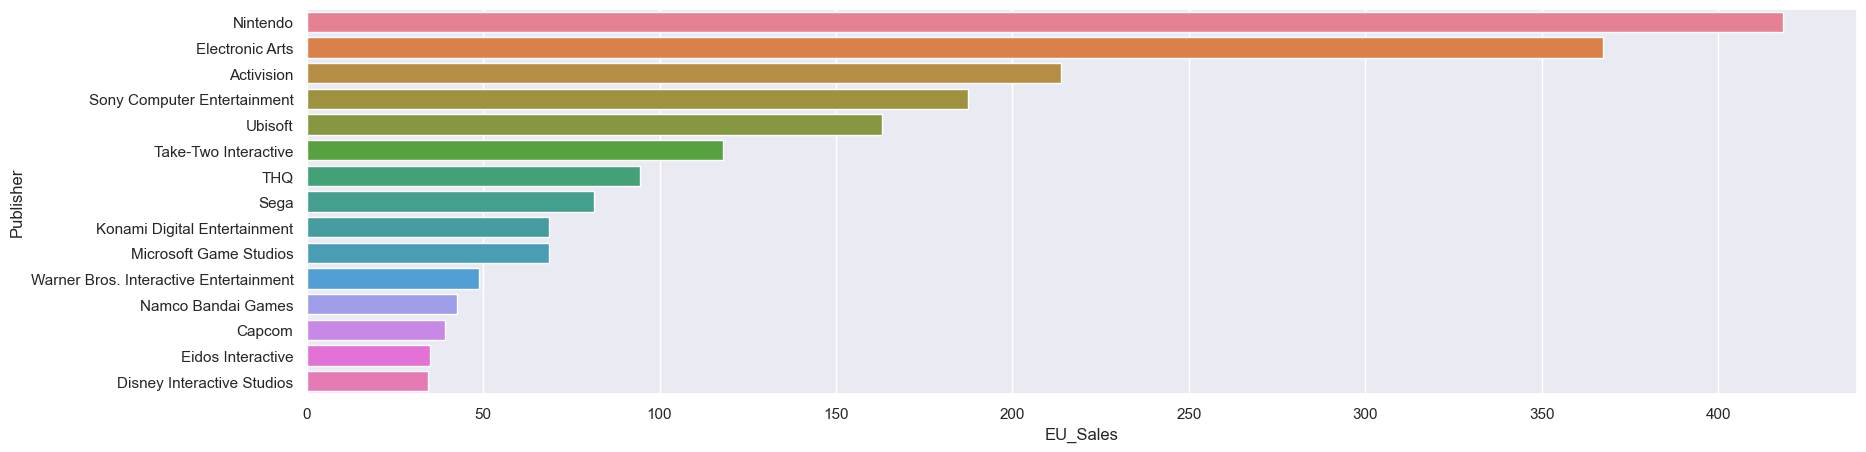

In [30]:
plot_data = df.groupby(['Publisher'], as_index=False)['EU_Sales'].sum().sort_values(by='EU_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'EU_Sales', y = 'Publisher', hue='Publisher')

<Axes: xlabel='JP_Sales', ylabel='Publisher'>

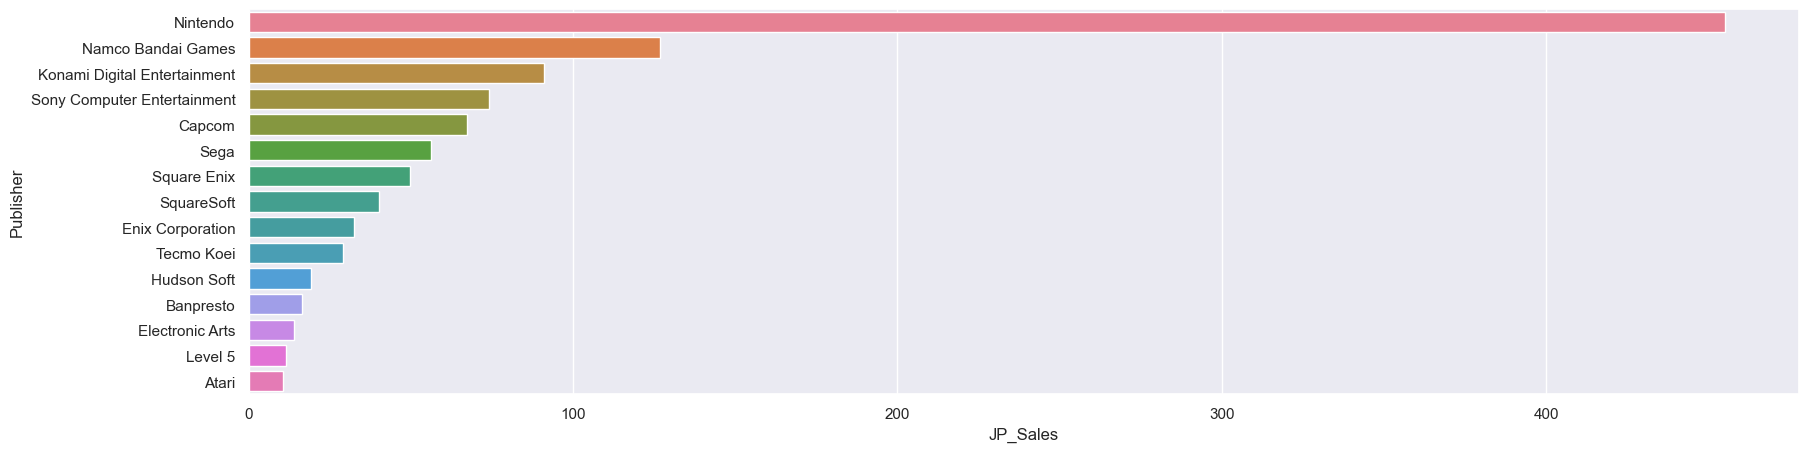

In [31]:
plot_data = df.groupby(['Publisher'], as_index=False)['JP_Sales'].sum().sort_values(by='JP_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'JP_Sales', y = 'Publisher', hue='Publisher')

<Axes: xlabel='Other_Sales', ylabel='Publisher'>

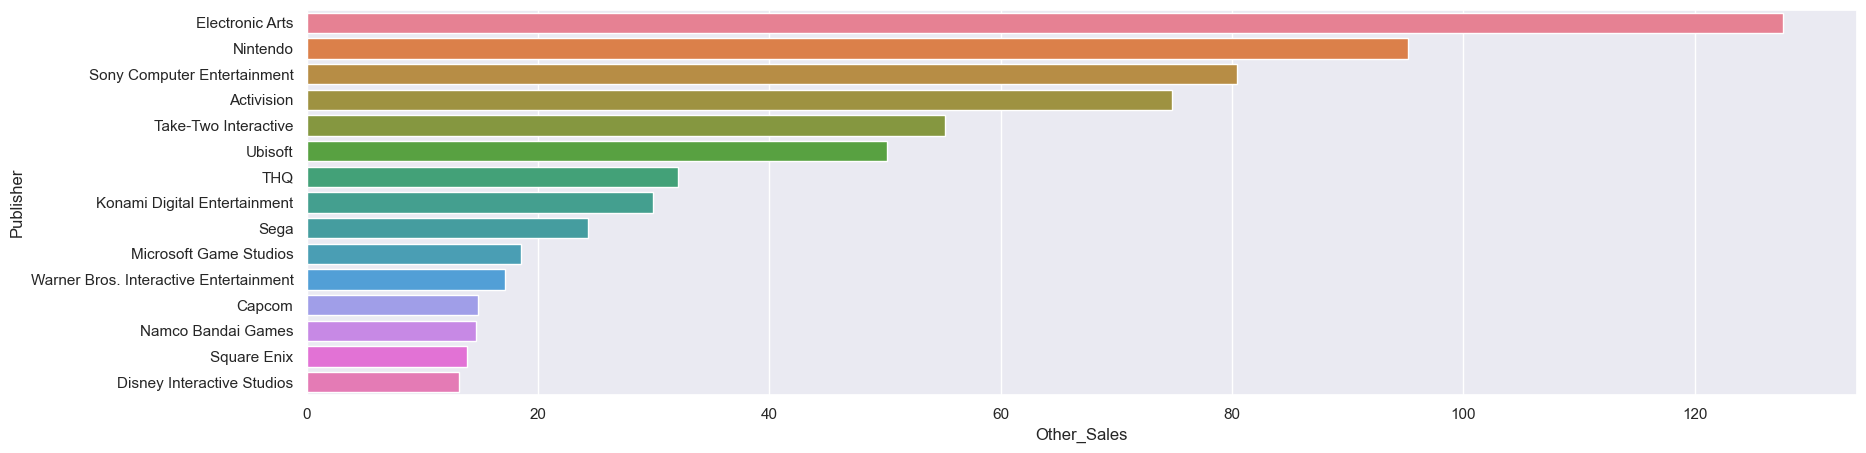

In [32]:
plot_data = df.groupby(['Publisher'], as_index=False)['Other_Sales'].sum().sort_values(by='Other_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'Other_Sales', y = 'Publisher', hue='Publisher')

<Axes: xlabel='Global_Sales', ylabel='Publisher'>

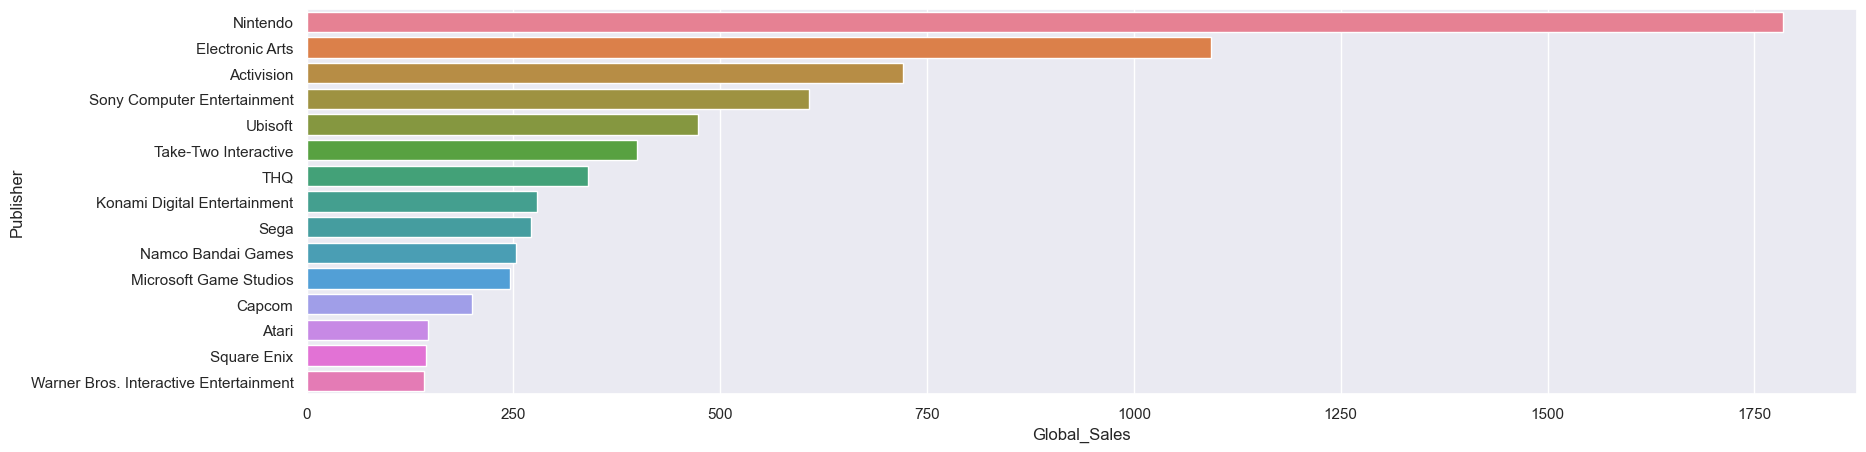

In [33]:
plot_data = df.groupby(['Publisher'], as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'Global_Sales', y = 'Publisher', hue='Publisher')

Nintendo has the largest sales market among the publishers in North America, European Union and Japan. In the other regions Electronic Arts has a foothold in video games sales. Still, Nintendo is the most favoured publisher globaly.

#### Analysis of Genre on the basis of sales

<Axes: xlabel='NA_Sales', ylabel='Genre'>

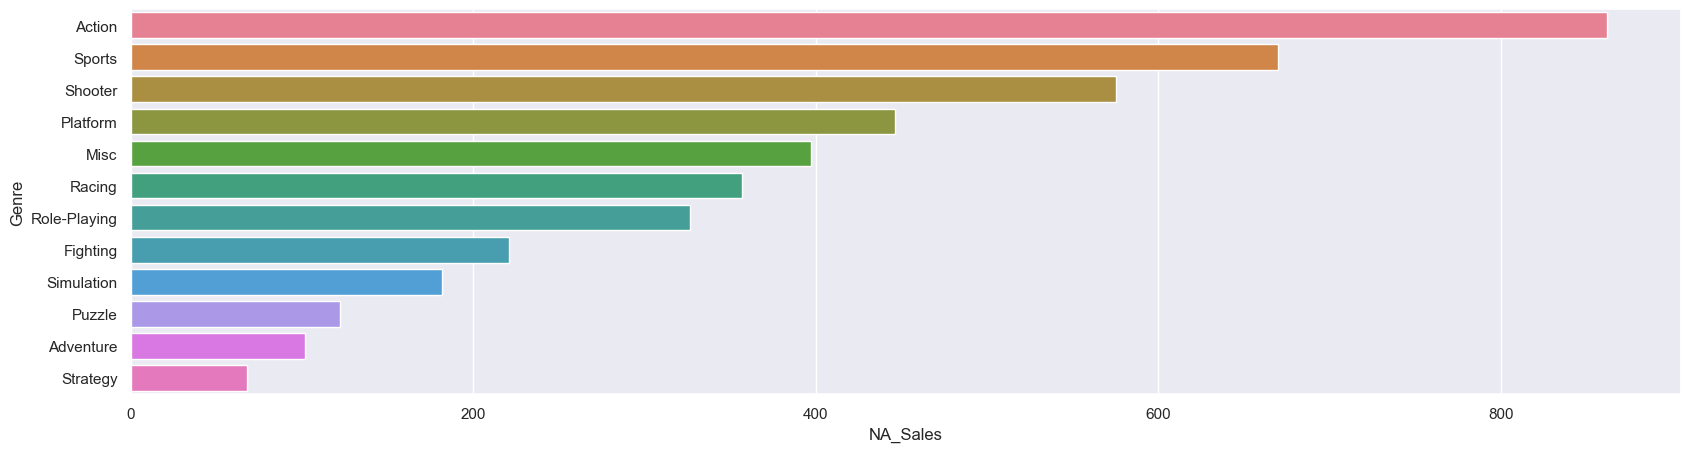

In [34]:
plot_data = df.groupby(['Genre'], as_index=False)['NA_Sales'].sum().sort_values(by='NA_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'NA_Sales', y = 'Genre', hue='Genre')

<Axes: xlabel='EU_Sales', ylabel='Genre'>

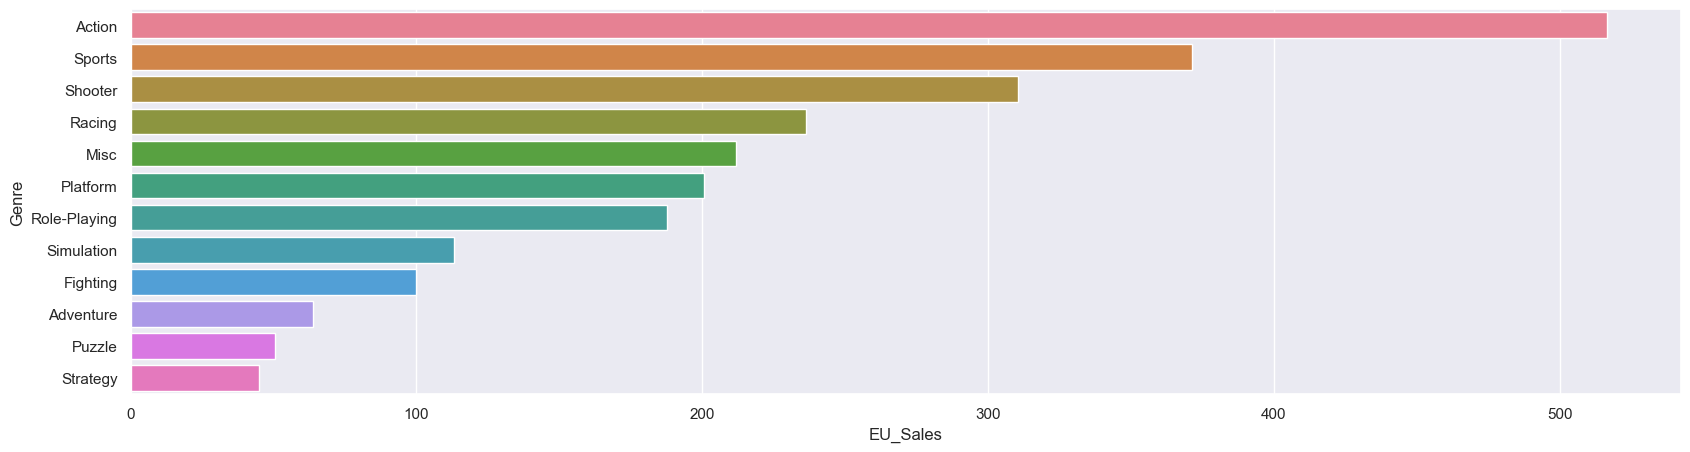

In [35]:
plot_data = df.groupby(['Genre'], as_index=False)['EU_Sales'].sum().sort_values(by='EU_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'EU_Sales', y = 'Genre', hue='Genre')

<Axes: xlabel='JP_Sales', ylabel='Genre'>

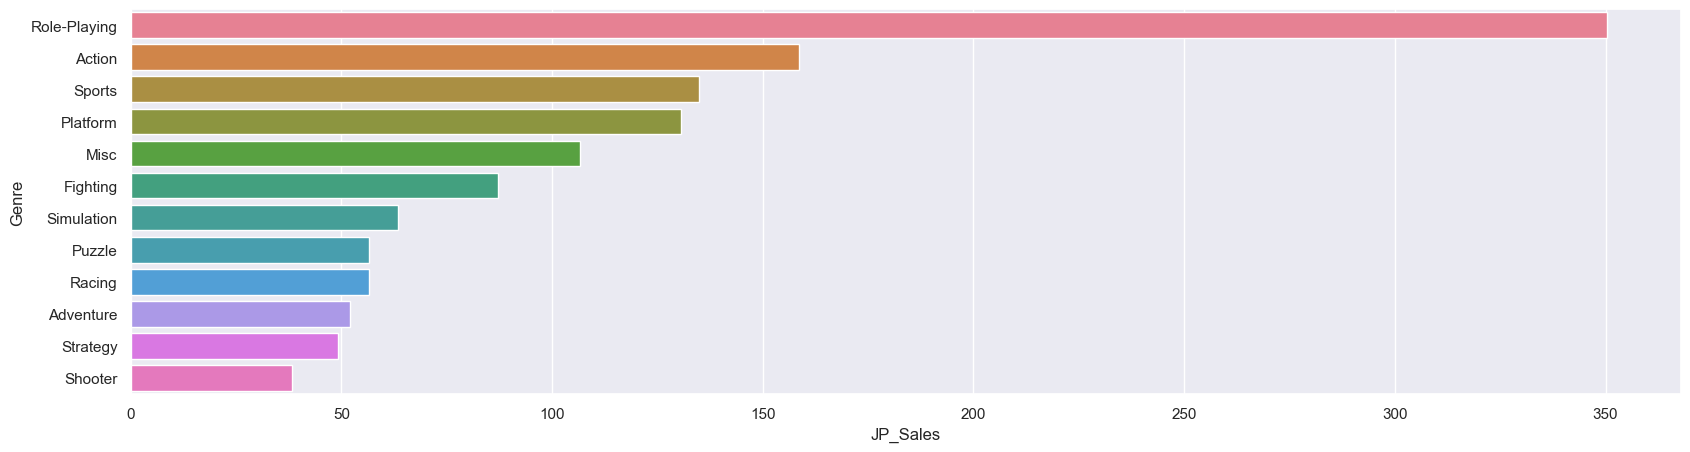

In [36]:
plot_data = df.groupby(['Genre'], as_index=False)['JP_Sales'].sum().sort_values(by='JP_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'JP_Sales', y = 'Genre', hue='Genre')

<Axes: xlabel='Other_Sales', ylabel='Genre'>

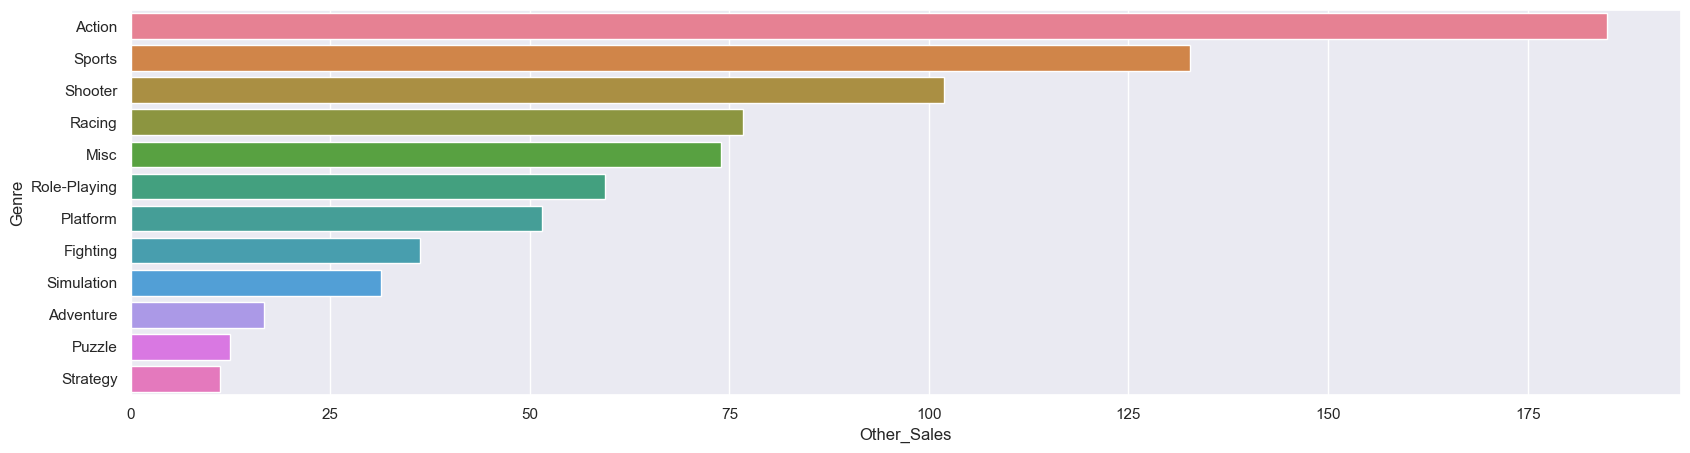

In [37]:
plot_data = df.groupby(['Genre'], as_index=False)['Other_Sales'].sum().sort_values(by='Other_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'Other_Sales', y = 'Genre', hue='Genre')

<Axes: xlabel='Global_Sales', ylabel='Genre'>

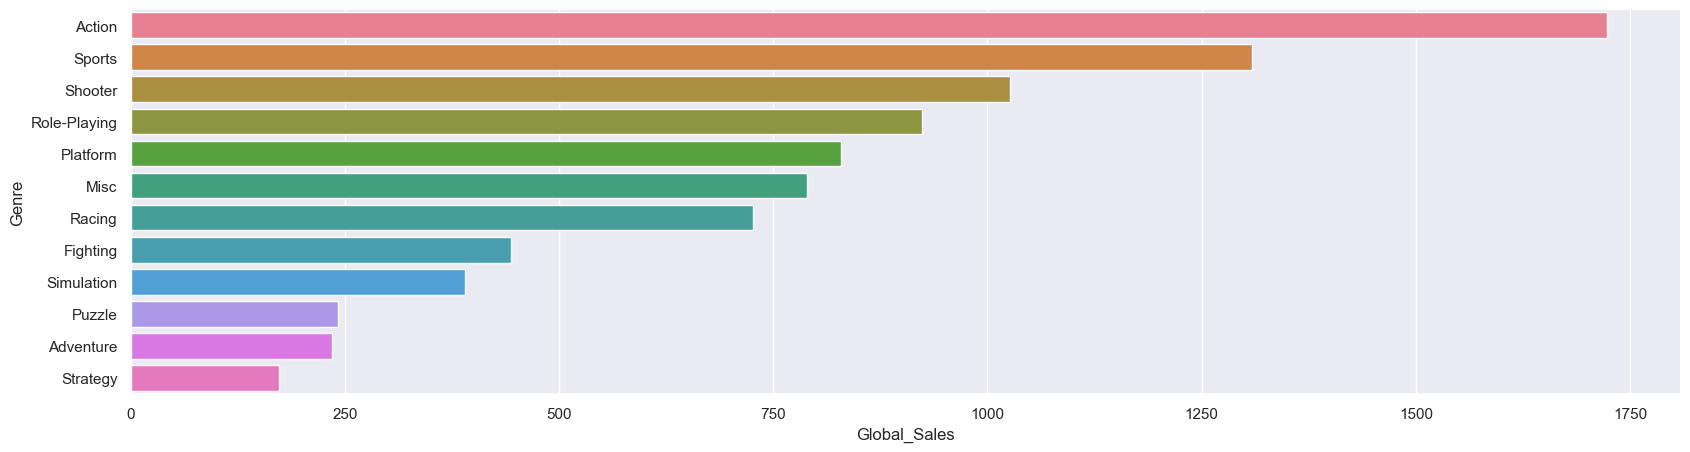

In [38]:
plot_data = df.groupby(['Genre'], as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'Global_Sales', y = 'Genre', hue='Genre')

Action genre games are most bought games globally except in Japan. In Japan, Role-Playing is most sought out genre.

### Summmary

1) Wii Sports is the most sold game in North America and European Union. Pokemon Red/Pokemon Blue is the most bought game in Japan while Grand Theft Auto: San Andreas is the most bought one in other regions. Wii Sports game stands highest in the global sales of video games.
2) X360 is the most used platform in North America while PS3 and DS are the most used in European Union and Japan respectively. PS2 is the most used platform in other regions and globally as well.
3) Nintendo has the largest sales market among the publishers in North America, European Union and Japan. In the other regions Electronic Arts has a foothold in video games sales. Still, Nintendo is the most favoured publisher globaly.
4) Action genre games are most bought games globally except in Japan. In Japan, Role-Playing is most sought out genre.